# Amazon Uk의 신발 제품 리뷰 데이터 감정 분석(Sentiment Analysis)

### [건국대학교 글로컬캠퍼스 컴퓨터공학과 202121859 이을호]

========================================================================

본 과제에서는 Amazon uk(영국)쇼핑몰의 신발 제품 판매 리뷰에 대한 긍정, 부정의 판별이 가능한 감정 분석 시스템 개발을 진행한다. 

모델의 구현은 하단의 과정을 순서로 개발을 진행한다.

1. 데이터 전처리 (결측치 처리, 노이즈 제거, 정규화 과정, 불용어 제거)

```결측치 처리, 노이즈 제거, 불용어 제거 과정을 통해 전처리를 완료함.```

2. 모델 구현

```nltk vader 모델을 통해 감정 분석을 진행 후 데이터 프레임에 결과 저장을 진행함.```

3. 모델 학습 및 튜닝 (dataset을 train, test로 분할, 모델 학습 및 하이퍼파라미터 튜닝(grid search or random search)를 통한 교차 검증)

```감정 분석 결과를 logistic regression을 통해 데이터 셋을 train과 test로 분할 후 모델에 학습시키고 성능을 향상시키기 위해 grid search를 적용하여 하이퍼파라미터 튜닝을 진행하여 학습을 시킨다```

4. 모델 평가 (정확도, 정밀도, 재현율, F1 score, ROC-AUC 지표를 통한 모델 검증 및 overfitting, underfitting 여부 확인 및 해결 방법)

```sklearn의 accuracy_score, precision_score, recall_score, f1_score, roc_auc_score 기능을 통해 각 지표를 출력하여 모델의 성능을 평가를 진행함. ```

5. 시각화 및 보고 (모델이 출력한 결과 및 수치값을 matplotlib를 통한 시각화 진행(혼동 행렬 및 ROC 곡선 생성))

```예측값을 기반으로 혼동 행렬과 ROC 곡선을 통해 최종 모델을 평가한다.```

-> 상기 내용을 보고서로 작성하여 별도 첨부함.

========================================================================

- Python Version : Python 3.10.13

# 1. 데이터 전처리:

우선, nltk의 감정 분석 단계에 들어가기에 앞서 데이터 전처리를 하단의 단계별로 진행한다.

- 1. 결측치 제거
- 2. 데이터 프레임 정리
- 3. 노이즈 제거 (정규화 활용)
- 4. 토큰화 및 불용어

	데이터 정리 (노이즈 제거, 결측값 처리 등).
	텍스트 토큰화 및 불용어 제거.
	텍스트 정규화 (스테밍 또는 표제어 추출).
	+) 필요하다면 더 추가해야 할 수도 있음

In [1]:
# 필요 라이브러리 import

%pip install matplotlib # 시각화 목적 matplotlib 설치
%pip install pandas # pandas 설치
%pip install numpy # numpy 설치

import matplotlib.pyplot as plt # 시각화 목적 matplotlib 설치
import numpy as np # numpy 모듈 import
import pandas as pd # pandas 모듈 import
import time # (작업 소요시간 계산) time 모듈 import
import ast # 구문 트리 파싱 및 분석에 사용하는 ast 모듈 import

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## 1) 결측치 제거

In [2]:
# 데이터 읽어와 로딩 후 출력 진행

print("파일 읽기 실행 중입니다...\n")
start = time.time() # 로딩 시작 시간 저장
df = pd.read_csv('./amazon_uk_shoes_products_dataset_2021_12.csv') # 파일 경로 지정
end = time.time() # 로딩 종료 시간 저장
print("파일 로딩에 걸린 시간은 " + str(round(end - start, 2)) + " 초입니다.") # 걸린 시간 출력

df.head() # 읽은 데이터 프레임 상단만 출력

파일 읽기 실행 중입니다...

파일 로딩에 걸린 시간은 0.05 초입니다.


,url,product_name,reviewer_name,review_title,review_text,review_rating,verified_purchase,review_date,helpful_count,uniq_id,scraped_at
0,https://www.amazon.co.uk/dp/B07SBX32T5,Klasified Women's Transparent Clear Sneaker Sh...,Jocelyn McSayles,Love em,Love these. Was looking for converses and thes...,5.0,True,Reviewed in the United States on 2 June 2020,2 people found this helpful,36eae4e5-2894-5279-a0b7-d2b330e2b814,24/12/2021 02:26:25
1,https://www.amazon.co.uk/dp/B07SBX32T5,Klasified Women's Transparent Clear Sneaker Sh...,Kenia Rivera,The plastic ripped,"The shoes are very cute, but after the 2nd day...",2.0,True,Reviewed in the United States on 28 October 2021,NaN,f4778bb8-3070-5cb1-b5aa-ffce41a97b57,24/12/2021 02:26:25
2,https://www.amazon.co.uk/dp/B07SBX32T5,Klasified Women's Transparent Clear Sneaker Sh...,Chris Souza,Good quality,Good quality,5.0,True,Reviewed in the United States on 20 January 2021,NaN,db5a7525-d40b-5265-84d8-df4f29837a3b,24/12/2021 02:26:25
3,https://www.amazon.co.uk/dp/B07SBX32T5,Klasified Women's Transparent Clear Sneaker Sh...,Amazon Customer,Good,Great,5.0,True,Reviewed in the United States on 22 April 2021,NaN,75a42851-6462-54b5-988a-27d336221943,24/12/2021 02:26:25
4,https://www.amazon.co.uk/dp/B08SW434MG,"GUESS Women's Bradly Gymnastics Shoe, White, 7 UK",Graziella,PERFETTE!!,Ho scelto il modello bianco con rifinitura die...,5.0,True,Reviewed in Italy on 2 April 2021,2 people found this helpful,232dee43-849e-5d06-ba05-efb3f4814714,24/12/2021 02:26:25


### 데이터를 우선 살펴보면 "Amazon_uk_shoes_products_dataset_2021_12.csv"는 하단의 순서대로 데이터가 이루어져 있음을 확인 가능하다.

1. url (상품 URL 주소)
2. product_name (상품명)
3. reviewer_name (리뷰 등록자명)
4. review_title (리뷰 제목)
5. review_text (리뷰 내용)
6. review_rating (상품 리뷰 별점)
7. verified_purchase (실구매 확인 여부)
8. review_date (리뷰 작성 날짜)
9. helpful_count (해당 리뷰가 도움이 된 사람의 수)
10. uniq_id (리뷰 특정 ID)
11. scraped_at (해당 리뷰를 가져온 시점)

결측치는 학습 과정에 있어서 문제가 발생할 가능성이 있기에 제거를 진행한다

In [3]:
# 결측치 확인 및 제거

df.isnull().sum() # 결측치 값이 존재하는 데이터 갯수 출력

url                     0
product_name            0
reviewer_name           0
review_title            1
review_text             9
review_rating           0
verified_purchase       0
review_date             0
helpful_count        4870
uniq_id                 0
scraped_at              0
dtype: int64

데이터 결측치의 여부를 확인한 결과 review_title과 review_rating은 없는 데이터만 없애면 상관 없지만, helpful_count의 경우에는 너무 많기 때문에 그냥 열을 제거하는 것으로 진행한다.

In [4]:
# helpful_count 열 제거 및 결측치가 존재하는 행을 제거

df = df.drop(["helpful_count"], axis=1) # helpful_count 열을 제거함
df = df.dropna(axis=0) # 결측치 존재하는 행 제거

df.isnull().sum() # 결측치 여부 확인

url                  0
product_name         0
reviewer_name        0
review_title         0
review_text          0
review_rating        0
verified_purchase    0
review_date          0
uniq_id              0
scraped_at           0
dtype: int64

결측치가 완벽하게 제거된 것을 위와 같이 확인이 가능하며, 하단에서는 데이터가 일정하게 존재하는지를 확인한다.

In [5]:
# 결측치 제거 후 총 데이터 갯수 확인

df.count() # 데이터 갯수 출력

url                  6813
product_name         6813
reviewer_name        6813
review_title         6813
review_text          6813
review_rating        6813
verified_purchase    6813
review_date          6813
uniq_id              6813
scraped_at           6813
dtype: int64

그럼 데이터 결측치가 정리되었으니, 다음 단계인 데이터 프레임 정리에 들어가겠다.

## 2) 데이터 프레임 정리

감정 분석에 사용 가능한 의미가 있는 상품명, 리뷰 제목, 리뷰 작성자, 리뷰 내용, 별정을 제외하고는 모두 제거하겠다.

In [6]:
# 기존의 데이터 프레임에서 필요 없는 열을 삭제 진행

df = df.drop(["url", "verified_purchase", "uniq_id", "scraped_at", "review_date"], axis=1) # 불필요한 열 삭제
df.head() # 편집 결과 출력

,product_name,reviewer_name,review_title,review_text,review_rating
0,Klasified Women's Transparent Clear Sneaker Sh...,Jocelyn McSayles,Love em,Love these. Was looking for converses and thes...,5.0
1,Klasified Women's Transparent Clear Sneaker Sh...,Kenia Rivera,The plastic ripped,"The shoes are very cute, but after the 2nd day...",2.0
2,Klasified Women's Transparent Clear Sneaker Sh...,Chris Souza,Good quality,Good quality,5.0
3,Klasified Women's Transparent Clear Sneaker Sh...,Amazon Customer,Good,Great,5.0
4,"GUESS Women's Bradly Gymnastics Shoe, White, 7 UK",Graziella,PERFETTE!!,Ho scelto il modello bianco con rifinitura die...,5.0


## 3) 노이즈 제거 (정규식 활용)

다음은 영어를 기반으로 감정 분석을 진행하기에 기본의 리뷰 제목과, 리뷰 내용에서 영어와 공백을 제외하고 다른 문자는 모두 제거하는 과정을 정규식을 통해 진행한다.

In [7]:
import re # 정규식 import

def remove_noise(text): # 노이즈 제거 함수 정의
    clear_noise = re.sub(r'[^A-Za-z\s]', '', text) # 입력된 텍스트에 대해 영어(대,소문자)와 공백을 제외한 모든 문자를 제거함
    return clear_noise # 제거 완료된 결과를 return

df['review_title'] = df['review_title'].apply(remove_noise) # 리뷰 제목 노이즈 제거
df['reviewer_name'] = df['reviewer_name'].apply(remove_noise) # 리뷰 내용 노이즈 제거

## 4) 토큰화 진행 (nltk 활용)

다음은 문장을 토큰화를 통해 단어 단위로 분리하여 새로 저장한다. 토큰화 기능은 nltk의 word_tokenize를 통해 진행한다.

In [8]:
#nltk 관련 필요 모듈 import

%pip install nltk #pip를 통해 nltk 설치
import nltk as nltk # nltk import
from nltk.corpus import stopwords # 불용어 제거 목적 stopwords import (미리 불러놓음)
from nltk.sentiment.vader import SentimentIntensityAnalyzer # nltk의 VADER 감정 분석기 import 진행
nltk.download('vader_lexicon') # VADER 모델의 감정 분석기에 필요한 어휘 자료를 다운로드

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 29.7 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 775.1/775.1 kB 19.1 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 3.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/codespace/nltk_data...


True

In [9]:
# nltk의 tokenize 기능을 이용하여 리뷰 제목과 내용을 토큰화 진행 후 새로은 열을 만들어 각각 저장

from nltk.tokenize import word_tokenize  #nltk의 tokenize 기능 import

nltk.download('punkt') # tokenize에 필요한 punkt 다운로드

df["review_title_token"] = df.review_title.apply(word_tokenize) # review_title 내용을 tokenize 진행하여 review_title_token에 저장
df["review_text_token"] = df.review_text.apply(word_tokenize) # review_text 내용을 tokenize 진행하여 review_text_token에 저장

[nltk_data] Downloading package punkt to /home/codespace/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [10]:
# 결과 확인

df.head()

,product_name,reviewer_name,review_title,review_text,review_rating,review_title_token,review_text_token
0,Klasified Women's Transparent Clear Sneaker Sh...,Jocelyn McSayles,Love em,Love these. Was looking for converses and thes...,5.0,"[Love, em]","[Love, these, ., Was, looking, for, converses,..."
1,Klasified Women's Transparent Clear Sneaker Sh...,Kenia Rivera,The plastic ripped,"The shoes are very cute, but after the 2nd day...",2.0,"[The, plastic, ripped]","[The, shoes, are, very, cute, ,, but, after, t..."
2,Klasified Women's Transparent Clear Sneaker Sh...,Chris Souza,Good quality,Good quality,5.0,"[Good, quality]","[Good, quality]"
3,Klasified Women's Transparent Clear Sneaker Sh...,Amazon Customer,Good,Great,5.0,[Good],[Great]
4,"GUESS Women's Bradly Gymnastics Shoe, White, 7 UK",Graziella,PERFETTE,Ho scelto il modello bianco con rifinitura die...,5.0,[PERFETTE],"[Ho, scelto, il, modello, bianco, con, rifinit..."


상단의 결과를 보면 review_title_token과 review_text_token에 잘 분리되어 저장된 것을 확인 가능하다.

## 5) 불용어 제거 (nltk 활용)

다음은 불용어를 제거하는 과정을 진행한다. 

불용어는 감정 분석에 있어서 특별한 의미를 가지지 않는 단어를 의미하며, 감정 분석 단계에서 존재할 경우에는 정확도에 문제가 발생하기에 미리 제거하는 과정을 거친다.

nltk의 stopwords를 다운로드 진행하여 리뷰가 영어이기에 english로 세팅하여 불용어 제거 기능을 함수로 
생성한 후 각 dataframe에 함수를 적용하여 불용어를 제거하는 과정을 진행한다.

In [11]:
# stopword 리스트를 외부에서 가져와서 지금의 리뷰에서 존재하는 stopword를 제거하는 과정을 여기에서 진행함

nltk.download('stopwords') # 불용어 제거 기능을 사용하기 위해 stopwords를 다운로드

start = time.time() # 로딩 시작 시간 저장
cache = set(stopwords.words("english")) # stopword 단어를 영어로 지정

def remove_stopwords(review_tokens): # 불용어 제거 기능 함수 정의
    text = " ".join([word.lower() for word in review_tokens if word not in cache]) # 소문자 처리 후 불용어에 해당하는 것은 제거하고 아닌것은 공백으로 구분하여 저장
    return text

# Remove the stop words from both columns
df["review_title_token"] = df.review_title_token.apply(remove_stopwords) # review_title_token에 불용어 제거 진행 후 다시 저장
df["review_text_token"] = df.review_text_token.apply(remove_stopwords) # eview_text_token에 불용어 제거 진행 후 다시 저장

end = time.time() # 로딩 종료 시간 저장
print("불용어 제거에 걸린 시간은 " + str(round(end - start, 2)) + " 초입니다.") # 걸린 시간을 출력함.

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


불용어 제거에 걸린 시간은 0.2 초입니다.


In [12]:
# 정리 완료한 데이터 프레임 상태 확인

df.head(10)

,product_name,reviewer_name,review_title,review_text,review_rating,review_title_token,review_text_token
0,Klasified Women's Transparent Clear Sneaker Sh...,Jocelyn McSayles,Love em,Love these. Was looking for converses and thes...,5.0,love em,love . was looking converses half price unique...
1,Klasified Women's Transparent Clear Sneaker Sh...,Kenia Rivera,The plastic ripped,"The shoes are very cute, but after the 2nd day...",2.0,the plastic ripped,"the shoes cute , 2nd day wearing tongue starte..."
2,Klasified Women's Transparent Clear Sneaker Sh...,Chris Souza,Good quality,Good quality,5.0,good quality,good quality
3,Klasified Women's Transparent Clear Sneaker Sh...,Amazon Customer,Good,Great,5.0,good,great
4,"GUESS Women's Bradly Gymnastics Shoe, White, 7 UK",Graziella,PERFETTE,Ho scelto il modello bianco con rifinitura die...,5.0,perfette,ho scelto il modello bianco con rifinitura die...
5,"GUESS Women's Bradly Gymnastics Shoe, White, 7 UK",Francesca,delusione,Sono solita comprare scarpe Guess e non ho mai...,1.0,delusione,sono solita comprare scarpe guess e non ho mai...
6,"GUESS Women's Bradly Gymnastics Shoe, White, 7 UK",Cliente,Molto belle,"Le scarpe sono molto belle, calzano perfettamente",5.0,molto belle,"le scarpe sono molto belle , calzano perfettam..."
7,"GUESS Women's Bradly Gymnastics Shoe, White, 7 UK",Cliente Amazon,Molto carine e comode,Semplicemente perfette. Io uso plantari su mis...,5.0,molto carine e comode,semplicemente perfette . io uso plantari su mi...
8,"GUESS Women's Bradly Gymnastics Shoe, White, 7 UK",Marcella,Bellissimepeccato per il numero,"Le scarpe sono bellissime, arrivate in perfett...",5.0,bellissimepeccato per il numero,"le scarpe sono bellissime , arrivate perfetto ..."
9,"GUESS Women's Bradly Gymnastics Shoe, White, 7 UK",Giuseppe,Scarpe ben realizzate venditore ottimo,Le scarpe sono ben fatte e il venditore molto ...,5.0,scarpe ben realizzate venditore ottimo,le scarpe sono ben fatte e il venditore molto ...


상단을 보면 review_title_token과 review_text_token에 해당하는 데이터들이 단어 단위로 잘 분리되어 감정 분석에 준비가 완료된 것을 확인 가능하다. 그럼 이제 감정 분석 및 logistic regression 모델 학습 단계로 넘어가겠다.

# 2. 모델 구현

수업에서 활용한 모델을 적용 (nltk의 vader 모델을 통한 감정 분석 데이터 활용 logistic regression 진행)

우선, nltk의 vader 모델을 통한 review_title_token과 review_text_token의 내용을 기반으로 감정 분석을 통해 결과를 도출하여 review_title_sentiment_score, review_text_sentiment_socre에 각각 저장하여 데이터 프레임에 저장하는 과정을 진행한다.

이후에는 logistic regression에 데이터를 학습시키기 위해서는 -1 ~ 1 사이의 소수점 값에서 (0 : 부정)과 (1 : 긍정)로 분리된 이진 값으로 변경하여 넣어야 하기에, 변경을 진행하는 함수를 생성하여 적용한다.

마지막으로, 리뷰 내용을 분석하는 모델을 학습시키기 위하여 별도의 데이터프레임으로 product_name, review_text_token, review_text_sentiment_score을 각각 뽑아 새로 만드는 과정을 진행한다.

### 1) nltk의 vader 모델을 통한 감정 분석 진행 및 데이터 저장

우선 감정 분석 기능을 수행하는 함수(calc_sentiment)를 정의한다.

In [13]:
# vader 모델을 감정 분석기로 초기화 진행 후 감정 분석 기능 함수 생성

vader_sentiment = SentimentIntensityAnalyzer() # VADER 감정 분석기 초기화

def calc_sentiment(review): # 감정 분석 함수 정의
    return vader_sentiment.polarity_scores(review)["compound"] # 모든 데이터 감정 분석 진행

이후에는 -1 ~ 1 사이의 소수점 값으로 감정 분석 결과가 나오는 것을 이진 값으로 변환하는 change_to_binary 함수를 정의한다

In [14]:
# logistic regression 적용을 위한 값 변환 함수 정의

def change_to_binary(sentiment_score): # 이진 값으로 감정 분석 결과를 변경함
    if sentiment_score >= 0.1: # 값이 0.1 이상이면 긍정, 나머지는 부정으로 처리함.
        return 1  # 긍정 감정
    else:
        return 0  # 부정 감정

이제 감정 분석을 진행할 review_title, review_text를 각각 분석을 진행하여 새로운 열로 데이터프레임에 추가한다.

In [15]:
# vader 모델을 통한 감정 분석 도출 및 데이터 프레임에 계산 결과 추가

print("리뷰 제목과 리뷰 내용 감정 분석 결과 데이터프레임에 추가 작업 진행...\n")
start = time.time()
df["review_title_sentiment_score"] = df.review_title.apply(calc_sentiment).round(2) # 감정 분석 결과값을 소수점 두자리수까지 반올림해서 저장함
df["review_text_sentiment_score"] = df.review_text.apply(calc_sentiment).round(2) # 감정 분석 결과값을 소수점 두자리수까지 반올림해서 저장함

end = time.time()
print("감정 분석 계산 시간 :  " + str(round(end - start, 2)) + " 초 소요")

리뷰 제목과 리뷰 내용 감정 분석 결과 데이터프레임에 추가 작업 진행...

감정 분석 계산 시간 :  2.63 초 소요


감정 분석 결과를 이진 값으로 변경한다.

In [16]:
# 이진 값으로 변환 진행 (logistic regression을 사용하기 위해 결과 값을 0 : 부정, 1 : 긍정으로 변환함)

df["review_title_sentiment_score"] = df.review_title_sentiment_score.apply(change_to_binary) # review_title_sentiment_score의 값을 이진화 진행
df["review_text_sentiment_score"] = df.review_text_sentiment_score.apply(change_to_binary) # review_text_sentiment_score의 값을 이진화 진행

In [17]:
# 준비 완료된 데이터를 데이터 프레임으로 편집

df_review = df[['product_name', 'review_text_token', 'review_text_sentiment_score']] # 필요한 데이터 열만 뽑아 새로운 데이터 프레임 생성
df_review

,product_name,review_text_token,review_text_sentiment_score
0,Klasified Women's Transparent Clear Sneaker Sh...,love . was looking converses half price unique...,1
1,Klasified Women's Transparent Clear Sneaker Sh...,"the shoes cute , 2nd day wearing tongue starte...",1
2,Klasified Women's Transparent Clear Sneaker Sh...,good quality,1
3,Klasified Women's Transparent Clear Sneaker Sh...,great,1
4,"GUESS Women's Bradly Gymnastics Shoe, White, 7 UK",ho scelto il modello bianco con rifinitura die...,0
...,...,...,...
6818,"Clarks Vennor Wing, Men’s Low-Top Sneakers, Bl...","schicker schuh , läuft sich gut .",0
6819,"Clarks Vennor Wing, Men’s Low-Top Sneakers, Bl...",mieux que je ne l'imaginais . très bonne taill...,0
6820,"Rohde Men's Tivoli-H Mule, 82 Anthracite, 12.5 UK",habe sie als geschenk gekauft und sie sind seh...,1
6821,"Rohde Men's Tivoli-H Mule, 82 Anthracite, 12.5 UK",trage diese hausschuhe fast zwei monate jeden ...,0


이제 데이터는 준비되었으며 다음 단계인 logistic regression 회귀분석 단계로 넘어간다.

# 3. 모델 학습 및 튜닝

데이터셋을 학습 및 테스트 세트로 분할.

모델 학습 및 하이퍼파라미터 튜닝 (예: 그리드 서치 또는 랜덤 서치 사용).

교차 검증과 같은 기술을 사용하여 견고성 보장.

해당 모델 학습 및 튜닝 단계에서는 scikit-learn의 logistic regression 기능을 사용해 회귀분석을 진행한다.

분석의 단계는 다음과 같이 진행한다.

1. 필요 모듈 설치

2. 데이터 x, y 지정 및 데이터 벡터화 진행

3. train_data, test_data로 분할 진행

4. logistic regression 모델 생성 후 그리드 서치를 활용하여 최적 하이퍼파라미터 값 및 cross-validation(교차 검증 점수) 값 확인

5. 최적 하이퍼파라미터 값에 해당하는 모델을 통해 데이터를 학습하고 예측하는 과정 진행

### 1) 필요 모듈 설치

우선 logistic regression 모델의 생성 및 모델 평가을 위한 scikit-learn의 모듈을 import를 진행한다.

In [18]:
# 필요 모듈 설치

from sklearn.model_selection import train_test_split # test, train 데이터 분리 기능
from sklearn.feature_extraction.text import TfidfVectorizer # 벡터화 진행 기능
from sklearn.linear_model import LogisticRegression # logistic regression 모델 
from sklearn.model_selection import GridSearchCV # 그리드 서치 기능
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve # 정확도, 정밀도, 재현율, f1 점수, roc-auc 점수 기능
from sklearn.metrics import confusion_matrix, classification_report # 혼돈 행렬, 분류 보고서 (종합 결과) 기능

### 2) 데이터 지정 및 리뷰 토큰화 데이터 벡터화 진행

logistic regression 모델에 학습 데이터로 넣기 위해서는 문자 형태로 되어있는 review_text_token을 벡터화를 진행하는 과정을 거친다.

벡터화를 통해 리뷰 내용의 단어의 등장 빈도를 나타내는 TF-IDF 벡터로 변환하여 적용을 진행하는데, 이런 상위 단어 등장 빈도 갯수를 의미하는 max_features 값이 1000을 넘어가면 커널이 불완전 종료되는 현상에 1000으로 고정을 시켜두고 진행한다.

In [19]:
# 데이터 지정
y = df['review_text_sentiment_score'] # y에 감정 분석 값(이진값) 지정

# TF-IDF 벡터화
vectorizer = TfidfVectorizer(max_features=1000) # TF-IDF 벡터화 진행 (1000개 고정)
x = vectorizer.fit_transform(df['review_text_token']) # x에 review_text_token을 벡터화한 값을 저장

### 3) train data, test data로 각각 분할

다은은 x와 y를 test, train 데이터로 분할을 진행한다.

In [20]:
# 학습 데이터와 테스트 데이터로 분할 진행
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) # 분할을 train 데이터 80%, test 데이터 20%로 나누고 시드값을 42로 지정

### 4) logistic Regression 모델 초기화 및 그리드 서치 활용 최적 모델 출력

해당 단계에서는 logistic regression 모델을 정의하고, 하이퍼파라미터 그리드를 지정하여, 그리드 서치를 통한 최적 파라미터를 탐색하여 그 값과 cross-validation값을 출력하는 과정을 거친다.

하단의 작업은 10분 정도 소요됨

In [21]:
# Logistic Regression 모델 초기화
model = LogisticRegression() # 회귀 모델을 초기화

# 하이퍼파라미터 그리드 설정
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]} # 하이퍼파라미터 값을 0.001 ~ 100까지 소수점 단위로 지정

# 그리드 서치를 사용하여 최적의 하이퍼파라미터 탐색
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy') # 그리드 서치 정의 (모델, 하이퍼파라미터 그리드, 교차검증을 5폴드로 사용, 정확도를 기반으로 비교)
grid_search.fit(x_train, y_train) # 그리드 서치 진행

# 최적 하이퍼파라미터 값과 최고 cross-validation 값 출력
print("Best parameters:", grid_search.best_params_) # 최적 하이퍼파라미터 값 출력
print("Best cross-validation score:", grid_search.best_score_) # 최고 cross-validation 값 출력

Best parameters: {'C': 10}
Best cross-validation score: 0.8867889908256881


그리드 서치 수행 결과 하이퍼파라미터 값 C : 10에서 가장 최적의 결과를 보였으며 교차 검증 점수가 약 88%인 것을 확인 가능하다.

### 5) 위에서 찾은 최적의 모델을 활용하여 학습 및 예측 진행

위에서 찾은 최적의 하이퍼파라미터 값 C:10을 기반으로 최적 모델을 final_model로 정의하여 최종 모델 예측을 진행한다.

In [22]:
# 최적의 모델을 사용 데이터 학습 진행
final_model = grid_search.best_estimator_ # 위에서 C:10 하이퍼파라미터 값을 가진 모델을 final_model에 저장
final_model.fit(x_train, y_train) # 학습 진행

# 테스트 데이터에 대해 예측
y_pred = final_model.predict(x_test) # 테스트 데이터에 대한 예측 진행

# 4. 모델 평가:

정확도, 정밀도, 재현율, F1 점수 및 ROC-AUC와 같은 지표를 사용하여 모델 평가.
오버피팅과 언더피팅을 논의하고 이를 해결하는 방법 학습.

모델 평가 단계에서는 위에 학습을 마친 예측 모델 y_pred를 기반으로 정확도, 정밀도, 재현율, F1 점수, ROC-AUC 지표를 통해 모델 평가를 진행한다.

이후에는, 예측 결과를 통해 오버피팅, 언더피팅을 확인한다.


In [23]:
# 정확도 평가
accuracy = accuracy_score(y_test, y_pred) # 정확도 계산
print("Accuracy:", accuracy)

# 정밀도 평가
precision = precision_score(y_test, y_pred, average='weighted')  # 정밀도 계산
print("Precision:", precision)

# 재현율 평가
recall = recall_score(y_test, y_pred, average='weighted')  # 재현율 계산
print("Recall:", recall)

# F1 점수 평가
f1 = f1_score(y_test, y_pred, average='weighted')  # F1 점수 계산
print("F1 Score:", f1)

# ROC-AUC 점수 계산
roc_auc = roc_auc_score(y_test, y_pred)  # roc-auc 계산
print("ROC-AUC Score:", roc_auc)

# 분류 보고서 출력
class_report = classification_report(y_test, y_pred)  # 전체 모델 분류 보고서 도출
print("Classification Report:")
print(class_report)

Accuracy: 0.8892149669845928
Precision: 0.8896068492093696
Recall: 0.8892149669845928
F1 Score: 0.8893294648740914
ROC-AUC Score: 0.8888145515823296
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       602
           1       0.91      0.89      0.90       761

    accuracy                           0.89      1363
   macro avg       0.89      0.89      0.89      1363
weighted avg       0.89      0.89      0.89      1363



###  < 모델 성능 분석 > 

==============================================================================================================================================

1. 정확도 (Accuracy: 0.8892149669845928) : 모델의 예측 성능을 의미하는 값으로 약 88.9%의 성능을 보이며, 예측의 정확도가 높음을 확인 가능하다.

2. 정밀도 (Precision: 0.8896068492093696) : 모델이 예측한 값 중 실제 데이터가 일치한 비율을 의미하는 값으로 약 88.9%의 성능을 보이며, 정밀도 역시 높음을 확인 가능하다.

3. 재현율 (Recall: 0.8892149669845928) : 실제 데이터 중 모델이 예측한 값이 일치한 비율을 의미하는 값으로 88.9% 성능으로 재현율 역시 높음을 확인 가능하다.

4. F1 점수 (F1 Score: 0.8893294648740914) : F1 점수는 정밀도와 재현율의 조화 평균을 의미하는데 88.9% 인것을 확인하면 모델의 성능에 문제가 없음을 확인 가능하다.

5. ROC-AUC 점수 (ROC-AUC Score: 0.8888145515823296) : 모델의 성능을 평가하는 값으로 88.8%로 비교적 높은 성능을 보이는 것을 확인 가능하다.


전체 점수 보고(Classification Report)를 보면, 긍정 감정 분석의 예측이 부정 감정 분석의 예측 정확도 보다 높은 것을 확인 가능하다.

==============================================================================================================================================

### <언더피팅 오버피팅 여부 확인>

==============================================================================================================================================

데이터 성능을 보면 정확도, 정밀도, 재현율의 성능이 결과가 88.9% 수준에서 비슷하며 모델의 성능이 전체적으로 높음에 따라 오버피팅, 언더피팅에는 해당하지 않음을 확인 가능하다.

==============================================================================================================================================

# 5. 시각화 및 보고
	Matplotlib 라이브러리를 사용하여 결과 시각화 진행
	혼동 행렬 및 ROC 곡선 생성

### 1) 혼동 행렬 생성 및 출력

In [24]:
confusion_matrix(y_test, y_pred) # 혼동 행렬 생성 및 출력 진행

array([[533,  69],
       [ 82, 679]])

혼동 행렬 ( [[533  69][82 679]] ) : [[TN, FP][FN, TP]]으로 해석하며 예측이 맞은 데이터와 틀린 데이터를 음성, 양성에 따라 나눈 지표로 양성 데이터 679개, 음성 데이터 533개가 예측에 성공하고, 양성 데이터 69, 음성 데이터 82가 예측에 실패한 것을 확인 가능하다. 혼동 행렬로 보면 예측 실패 데이터가 아직은 많음으로 조금은 모델을 개선할 필요성이 보인다.

=================================================

- TP : 실제 데이터 양성 -> 예측 데이터 양성

- TN : 실제 데이터 음성 -> 예측 데이터 음성

- FP : 실제 데이터 음성 -> 예측 데이터 양성

- FN : 실제 데이터 양성 -> 예측 데이터 음성

=================================================

### 2) matplotlib를 사용하여 ROC 곡선 생성

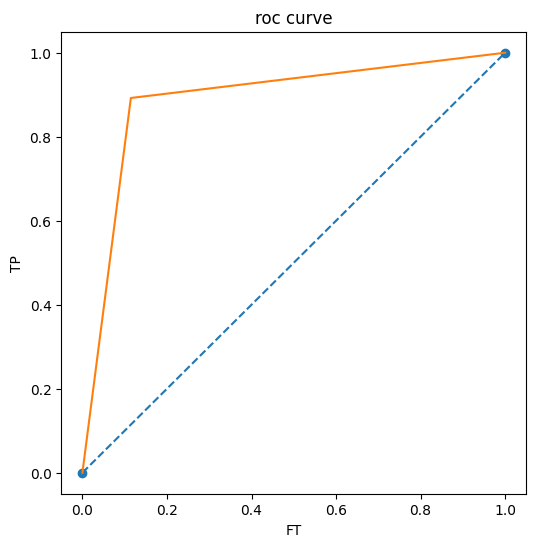

In [25]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred) # 혼동 행렬 계산 진행 (TP, FP, 분류 임계값)

fig = plt.figure(figsize=(6, 6)) # 그래프 사이즈 지정

plt.plot([0, 1], [0, 1], 'o--')

plt.plot(fpr, tpr) #FP와 TP를 기준으로 그래프 생성
plt.xlabel('FT') # x축 제목 지정
plt.ylabel('TP') # y축 제목 지정
plt.title('roc curve') # 그래프 제목 지정
plt.show() # 그래프 출력

위 roc 곡선을 분석하면 모델의 성능이 왼쪽 상단의 모서리에 가까울 수록 성능이 좋으나 roc_auc 점수가 88.8%로 낮은 편은 아니며 더 성능을 개선하기 위해서는 데이터의 전처리 과정에서 조금 더 불순한 데이터를 걸러내고, 데이터의 양을 방대하게 증가시켜 많은 데이터를 모델에 학습시키면 성능이 더 높아질 것으로 기대한다. 또한, 커널 불완전 종료 이슈로 더 올리지 못한 TF-IDF 진행 과정에서 정해놓은 단어의 갯수를 1000개에서 더 많은 갯수로 조정하고 하이퍼파라미터의 값을 더 세밀하게 조정하면 성능이 더욱 향상 될 것으로 기대한다.